# KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU

## Import thư viện cần thiết

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from dateutil import parser

## Thu thập dữ liệu

### Thông tin chung

- **Chủ đề dữ liệu**: Thông tin về Anime (Phim hoạt hình Nhật Bản)
- **Cách thu thập dữ liệu**: Bộ dữ liệu được thu thập từ nền tảng MyAnimeList, một cộng đồng và cơ sở dữ liệu trực tuyến phổ biến dành cho những người đam mê anime và manga. Nền tảng này cung cấp thông tin về các anime, hồ sơ người dùng và điểm của người dùng đánh giá cho các anime khác nhau. Chúng em sử dụng ngôn ngữ lập trình Python, cùng Selenium để trích xuất dữ liệu từ web.

## Khám phá và tiền xử lý dữ liệu

### Đọc dữ liệu từ file csv

In [2]:
anime_df = pd.read_csv('../data/animes.csv')

#### Hiển thị 5 hàng đầu tiên trong tập dữ liệu

In [3]:
anime_df.head()

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration,Score,Rating count,Rank,Popularity
0,1.0,Cowboy Bebop,26,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24 min. per ep.,8.75,988000.0,482,43.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",1 hr. 55 min.,8.38,219779.0,2092,631.0
2,6.0,Trigun,26,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24 min. per ep.,8.22,380049.0,3602,258.0
3,7.0,Witch Hunter Robin,26,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25 min. per ep.,7.24,44600.0,30982,1908.0
4,8.0,Bouken Ou Beet,52,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23 min. per ep.,6.93,6891.0,45862,5485.0


### Số hàng và số cột của tập dữ liệu

In [4]:
nrows, ncols = anime_df.shape
print('Số hàng của dataset:', nrows)
print('Số cột của dataset:', ncols)

Số hàng của dataset: 25012
Số cột của dataset: 14


### Ý nghĩa của mỗi hàng

Mỗi hàng chứa thông tin về 1 bộ anime như tên, thể loại, số tập, thời lượng, nhà sản xuất,... và xếp hạng dựa trên một số tiêu chí cũng như là điểm đánh giá trung bình cho anime đó do người dùng đánh giá trên nền tảng MyAnimeList.

### Loại bỏ những hàng không có dữ liệu

In [5]:
anime_df.dropna(how='all', inplace=True)

### Loại bỏ những hàng trùng lặp

In [6]:
num_duplicates = anime_df.duplicated().sum()
print(f"Số hàng trùng lặp: {num_duplicates}")

Số hàng trùng lặp: 19


In [7]:
anime_df = anime_df.drop_duplicates()

In [8]:
nrows, ncols = anime_df.shape
print('Số hàng của dataset sau khi xử lý:', nrows)

Số hàng của dataset sau khi xử lý: 24990


### Ý nghĩa của mỗi cột

In [9]:
# Xem tên của từng cột
anime_df.columns

Index(['ID', 'Title', 'Episodes', 'Type', 'Aired', 'Producers', 'Studios',
       'Source', 'Genres', 'Duration', 'Score', 'Rating count', 'Rank',
       'Popularity'],
      dtype='object')

#### Ý nghĩa của mỗi cột:
- Cột đầu tiên cho biết ID của anime (ID)
- Cột thứ 2 cho biết tên gốc của anime (Title)
- Cột thứ 3 cho biết số tập của anime (Episodes)
- Cột thứ 4 cho biết anime thuộc dạng phim dài tập hay movie,... (Type)
- Cột thứ 5 cho biết ngày bắt đầu và kết thúc việc phát sóng anime (Aired)
- Cột thứ 6 cho biết công ty hoặc nhà sản xuất của anime (Producers)
- Cột thứ 7 cho biết hãng làm phim hoạt hình làm ra anime (Studios)
- Cột thứ 8 cho biết nguồn tài liệu để làm ra anime (Source)
- Cột thứ 9 cho biết thể loại của anime, một anime có thể thuộc nhiều thể loại được phân tách bởi dấu phẩy (Genres)
- Cột thứ 10 cho biết thời lượng của mỗi tập trong anime (Duration)
- Cột thứ 11 cho biết điểm số trung bình đánh giá cho anime bởi người dùng (Score)
- Cột thứ 12 cho biết số lượng người dùng đã chấm điểm cho anime (Rating count)
- Cột thứ 13 cho biết xếp hạng của anime dựa trên Score, nếu cùng điểm sẽ so sánh các tiêu chí khác (Rank)
- Cột thứ 14 cho biết xếp hạng độ phổ biến của anime (Popularity)

Cột thứ 12 cho biết số lượng người dùng đã chấm điểm cho anime nhưng có tên Rating count chưa phù hợp lắm nên ta sẽ đổi tên cột thành Scored By.

In [10]:
anime_df.rename(columns={'Rating count': 'Scored By'}, inplace=True)

In [11]:
anime_df.head()

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration,Score,Scored By,Rank,Popularity
0,1.0,Cowboy Bebop,26,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24 min. per ep.,8.75,988000.0,482,43.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",1 hr. 55 min.,8.38,219779.0,2092,631.0
2,6.0,Trigun,26,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24 min. per ep.,8.22,380049.0,3602,258.0
3,7.0,Witch Hunter Robin,26,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25 min. per ep.,7.24,44600.0,30982,1908.0
4,8.0,Bouken Ou Beet,52,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23 min. per ep.,6.93,6891.0,45862,5485.0


### Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không? 


Ta sẽ thử xem xét các kiểu dữ liệu của của từng cột đã phù hợp chưa. 

In [12]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24990 entries, 0 to 25011
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          24990 non-null  float64
 1   Title       24990 non-null  object 
 2   Episodes    24990 non-null  object 
 3   Type        24990 non-null  object 
 4   Aired       24990 non-null  object 
 5   Producers   24990 non-null  object 
 6   Studios     24990 non-null  object 
 7   Source      24990 non-null  object 
 8   Genres      10879 non-null  object 
 9   Duration    24990 non-null  object 
 10  Score       16943 non-null  float64
 11  Scored By   16943 non-null  float64
 12  Rank        24990 non-null  object 
 13  Popularity  24990 non-null  float64
dtypes: float64(4), object(10)
memory usage: 2.9+ MB


Sau khi xem qua các cột dữ liệu ta thấy các cột nên có dữ liệu dạng số nhưng lại có dữ liệu object là: 
- Episodes
- Rank
- Duration

Do đó ta sẽ chuẩn hóa kiểu dữ liệu cho các cột này về dạng số.

In [13]:
col_convert = ['Episodes', 'Rank']
for col in col_convert:
    anime_df[col] = pd.to_numeric(anime_df[col], errors='coerce')

In [14]:
anime_df['Duration']

0        24 min. per ep.
1          1 hr. 55 min.
2        24 min. per ep.
3        25 min. per ep.
4        23 min. per ep.
              ...       
25007       1 hr. 3 min.
25008             2 min.
25009            Unknown
25010            Unknown
25011             1 min.
Name: Duration, Length: 24990, dtype: object

In [15]:
# Vì Duration chứa nhiều định dạng, ta thống nhất chuyển sang số phút
def convert_duration(duration):
    if duration == 'Unknown':
        return np.nan
    duration = duration.lower()
    hrs = re.search(r'(\d+) hr', duration)
    mins = re.search(r'(\d+) min', duration)
    secs = re.search(r'(\d+) sec', duration)

    total_mins = 0
    if hrs:
        total_mins += int(hrs.group(1))*60
    if mins:
        total_mins += int(mins.group(1))
    if secs:
        total_mins += int(secs.group(1))/60

    return round(total_mins,2)

In [16]:
anime_df['Duration'] = anime_df['Duration'].apply(convert_duration)
anime_df = anime_df.rename(columns={'Duration': 'Duration (mins)'})

In [17]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24990 entries, 0 to 25011
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               24990 non-null  float64
 1   Title            24990 non-null  object 
 2   Episodes         24725 non-null  float64
 3   Type             24990 non-null  object 
 4   Aired            24990 non-null  object 
 5   Producers        24990 non-null  object 
 6   Studios          24990 non-null  object 
 7   Source           24990 non-null  object 
 8   Genres           10879 non-null  object 
 9   Duration (mins)  24653 non-null  float64
 10  Score            16943 non-null  float64
 11  Scored By        16943 non-null  float64
 12  Rank             19849 non-null  float64
 13  Popularity       24990 non-null  float64
dtypes: float64(7), object(7)
memory usage: 2.9+ MB


Các kiểu dữ liệu còn lại đã phù hợp với nội dung nên ta sẽ tiếp tục phần tiếp theo

### Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

#### Đầu tiên ta sẽ lấy tên các cột có dữ liệu dạng số và lưu vào `numeric_columns`

In [18]:
numeric_columns = anime_df.select_dtypes(include='number').columns[:] 
numeric_columns

Index(['ID', 'Episodes', 'Duration (mins)', 'Score', 'Scored By', 'Rank',
       'Popularity'],
      dtype='object')

#### Sau đó, ta sẽ xem tỉ lệ giá trị bị thiếu trong các cột dữ liệu kiểu số là bao nhiêu:

In [19]:
percentage_missing_dic = {}
for col in numeric_columns:
    percentage_missing = anime_df[col].isna().mean() * 100
    percentage_missing_dic[col] = percentage_missing
    print(f'Phần trăm giá trị còn thiếu của cột \'{col}\' là {percentage_missing:.2f}%')

Phần trăm giá trị còn thiếu của cột 'ID' là 0.00%
Phần trăm giá trị còn thiếu của cột 'Episodes' là 1.06%
Phần trăm giá trị còn thiếu của cột 'Duration (mins)' là 1.35%
Phần trăm giá trị còn thiếu của cột 'Score' là 32.20%
Phần trăm giá trị còn thiếu của cột 'Scored By' là 32.20%
Phần trăm giá trị còn thiếu của cột 'Rank' là 20.57%
Phần trăm giá trị còn thiếu của cột 'Popularity' là 0.00%


#### Xử lý các giá trị bị thiếu ở các cột Score và Scored By

Thử kiểm tra xếp hạng độ phổ biến (Popularity) của những anime thiếu giá trị Score và Scored By.

In [20]:
null_rows = anime_df[anime_df['Score'].isnull()]

# Xếp hạng độ phổ biến của cột 'Popularity' trong các hàng có giá trị null
null_rows[['Popularity']].sort_values(by='Popularity', ascending=True).head(20)

,Popularity
22414,1018.0
20708,1546.0
22581,1707.0
24165,1818.0
21911,1989.0
23525,2677.0
21378,2745.0
20522,2764.0
23052,2789.0
24741,2865.0


Mặc dù tỉ lệ giá trị bị thiếu ở 2 cột Score và Scored By hơn 30% nhưng qua kiếm tra ta thấy những anime bị thiếu dữ liệu này có độ phổ biến không quá cao (từ 1018 trở xuống). Với mục tiêu phân tích xu hướng anime thịnh hành, đồng thời để tránh việc bị lệch phân phối dữ liệu khi điền giá trị bị thiếu bằng trung vị/ mô hình thì nhóm chọn cách xóa những hàng (anime) thiếu dữ liệu này.

In [21]:
anime_df = anime_df.dropna(subset=['Score'])
anime_df.shape

(16943, 14)

In [22]:
percentage_missing_dic = {}
for col in numeric_columns:
    percentage_missing = anime_df[col].isna().mean() * 100
    percentage_missing_dic[col] = percentage_missing
    print(f'Phần trăm giá trị còn thiếu của cột \'{col}\' là {percentage_missing:.2f}%')

Phần trăm giá trị còn thiếu của cột 'ID' là 0.00%
Phần trăm giá trị còn thiếu của cột 'Episodes' là 0.47%
Phần trăm giá trị còn thiếu của cột 'Duration (mins)' là 0.09%
Phần trăm giá trị còn thiếu của cột 'Score' là 0.00%
Phần trăm giá trị còn thiếu của cột 'Scored By' là 0.00%
Phần trăm giá trị còn thiếu của cột 'Rank' là 22.96%
Phần trăm giá trị còn thiếu của cột 'Popularity' là 0.00%


Do dữ liệu bị thiếu ở Episodes và Duration (mins) khá thấp nên ta xóa nó đi

In [23]:
anime_df = anime_df.dropna(subset=['Episodes', 'Duration (mins)'])
anime_df.shape

(16851, 14)

#### Tiếp theo ta xem qua mô tả của các cột có dữ liệu dạng số xem có gì bất thường không (tối thiểu, tối đa)

In [24]:
anime_df.describe()

,ID,Episodes,Duration (mins),Score,Scored By,Rank,Popularity
count,16851.000000,16851.000000,16851.00000,16851.000000,1.685100e+04,12996.000000,16851.000000
mean,24057.427927,11.272803,23.89639,6.397085,2.990047e+04,68195.500308,9178.796867
std,17949.117335,49.137997,25.08255,0.893152,1.180614e+05,39302.611218,5520.413849
min,1.000000,1.000000,0.05000,1.880000,1.030000e+02,12.000000,1.000000
25%,5652.500000,1.000000,5.00000,5.770000,3.715000e+02,34159.500000,4460.500000
50%,24371.000000,2.000000,23.00000,6.380000,1.689000e+03,68207.000000,8973.000000
75%,38801.500000,12.000000,26.00000,7.040000,1.061450e+04,102204.500000,13598.000000
max,57160.000000,3057.000000,168.00000,9.320000,2.858563e+06,136132.000000,21347.000000


Ta xem xét từng cột và nhận xét:
- ID có giá trị từ 1 đến 57160 mặc dù số lượng anime là 16943, vậy nên ta có thể suy ra ID của các anime là không liên tục.
- Cột Score có giá trị từ 1.88 đến 9.32 đây là 1 khoảng hợp lý cho đánh giá điểm số của anime, không có anime nào 10 và không có anime bị đánh giá 0 điểm. Điểm trung bình của các anime nằm quanh khoảng 6.4, với phần lớn từ 5 đến 7.
- Số lượng tập có sự chênh lệch lớn giữa các anime.
- Thời lượng các tập phần lớn nằm từ 23-26 phút. Đây là một khoảng thời gian khá phổ biến của các tập Anime.
- Độ phổ biến và số lượng người đánh giá cho thấy có sự chênh lệch đáng kể về mức độ phổ biến giữa các anime.
- Các cột đều có khoảng giá trị phù hợp với ý nghĩa của từng cột.

### Với mỗi cột có kiểu dữ liệu dạng phân loại, các giá trị được phân bố như thế nào?

Ở phần này sẽ có 2 dạng:
- Cột có giá trị đơn: Title, Type, Source, Aired.
- Cột có nhiều giá trị: Genres, Producers, Studios

#### Do đó đầu tiên ta sẽ xử lý trên các cột đơn trước

Đầu tiên lưu tên các cột có một giá trị vào `single_columns`

In [25]:
single_columns = ['Title', 'Type', 'Source', 'Aired']

Sau đó tính phần trăm giá trị còn thiếu của mỗi cột này

Ở bộ dữ liệu này các dữ liệu `NULL` đang được đánh dấu bằng nhiều chuỗi string khác nhau như: `Unknown`, `Not available`, `None found, add some`. Do đó ta sẽ thay thế các giá trị trên cũng như cả các dữ liệu `NULL` bằng một giá trị nhất quán `UNKNOWN` để đánh dấu các giá trị bị thiếu. 

In [26]:
values_to_replace = ["Unknown", "Not available", "None found, add some", np.nan]

# Thay thế các giá trị không mong muốn bằng "UNKNOWN"
for column in anime_df.columns:     
    if anime_df[column].dtype == "object":
        anime_df[column] = anime_df[column].replace(values_to_replace, "UNKNOWN")

In [27]:
for col in single_columns:
    percentage_missing = (anime_df[col] == 'UNKNOWN').mean() * 100
    percentage_missing_dic[col] = percentage_missing
    print(f'Phần trăm giá trị còn thiếu của cột \'{col}\' là {percentage_missing:.2f}%')

Phần trăm giá trị còn thiếu của cột 'Title' là 0.00%
Phần trăm giá trị còn thiếu của cột 'Type' là 0.01%
Phần trăm giá trị còn thiếu của cột 'Source' là 7.01%
Phần trăm giá trị còn thiếu của cột 'Aired' là 0.06%


Ta thấy các cột này có giá trị thiếu rất ít có thể do các dữ liệu này là các thông tin cơ bản của một anime nên hầu như tất cả các anime được sản xuất đều phải có các thông tin này

Lưu số lượng giá trị khác nhau và đếm số lượng từng loại và lưu vào mảng `single_cate_profile`

In [28]:
# Define single_columns explicitly (assuming it contains the columns to analyze)
single_columns = ["Title", "Type", "Source", "Aired"]

# Create an empty DataFrame with the correct structure
single_cate_profile = pd.DataFrame(index=["num_diff_vals", "distribution"], columns=single_columns)

# Calculate the number of unique values
num_diff_vals = anime_df[single_columns].nunique()

# Calculate the distribution
distribution = anime_df[single_columns].apply(lambda column: column.value_counts().to_dict())

# Assign the calculated values to the DataFrame
single_cate_profile.loc["num_diff_vals"] = num_diff_vals
single_cate_profile.loc["distribution"] = distribution

# Display the resulting DataFrame
single_cate_profile


,Title,Type,Source,Aired
num_diff_vals,16850,10,17,12092
distribution,{'Shen Lan Qi Yu Wushuang Zhu: Tianmo Pian': 2...,"{'TV': 4676, 'OVA': 3322, 'Movie': 2610, 'ONA'...","{'Original': 5456, 'Manga': 4525, 'UNKNOWN': 1...","{'2008': 33, '2006': 32, '2003': 31, '2004': 3..."


Các cột đều có giá trị không có gì bất thường. Riêng cột Title có số giá trị ít hơn số hàng của dữ liệu (16851 hàng). Ta sẽ in thử distribution ở cột Title để xem.

In [29]:
single_cate_profile.loc['distribution','Title']

{'Shen Lan Qi Yu Wushuang Zhu: Tianmo Pian': 2,
 'Cowboy Bebop': 1,
 'Oh! 96-kku': 1,
 'Devilman Memorial': 1,
 'Tori vs. Buta: Buttobi Pizza Battle': 1,
 'Kud Wafter': 1,
 'Basilisk: Ouka Ninpouchou': 1,
 'Baja no Studio': 1,
 'Wotaku ni Koi wa Muzukashii': 1,
 'Onyankopon': 1,
 'Fairy Tail: Final Series': 1,
 'Swan': 1,
 'Hope: Suiso Shakai to, Korekara no Energy no Hanashi': 1,
 "Shinmai 'FUREAI' Net. Concept Movie": 1,
 'Namae no Nai Hi': 1,
 'Windy': 1,
 'Kino': 1,
 'Nanatsu no Taizai Movie 1: Tenkuu no Torawarebito': 1,
 'Gundam Build Fighters: GM no Gyakushuu': 1,
 'Harukana Receive': 1,
 'Mahou Shoujo Lyrical Nanoha: Detonation': 1,
 'Dame x Prince Anime Caravan': 1,
 'Super Mario no Shouboutai': 1,
 'Satsuriku no Tenshi': 1,
 'Naeil-eun Pyeongbeomhae Jilgeoya': 1,
 'Märchen Mädchen': 1,
 'Dia Horizon (Kabu)': 1,
 'Sora to Umi no Aida': 1,
 'Alice or Alice': 1,
 'Two Car': 1,
 'Heartful Maman The Animation': 1,
 'Kidou Senshi Gundam Thunderbolt: Bandit Flower': 1,
 'Imouto Bitc

Ta thấy rằng bộ dữ liệu có 2 bộ phim trùng tên là: Shen Lan Qi Yu Wushuang Zhu: Tianmo Pian. 

In [30]:
duplicate_titles = anime_df[anime_df['Title'] == "Shen Lan Qi Yu Wushuang Zhu: Tianmo Pian"]
duplicate_titles

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration (mins),Score,Scored By,Rank,Popularity
22752,53367.0,Shen Lan Qi Yu Wushuang Zhu: Tianmo Pian,15.0,ONA,"Jan 14, 2023 to Apr 15, 2023","iQIYI, High Energy Studio, Xuanshi Tangmen",CG Year,Web novel,"Action, Fantasy",20.0,7.60,385.0,15502.0,14176.0
24119,55740.0,Shen Lan Qi Yu Wushuang Zhu: Tianmo Pian,15.0,ONA,"Jul 15, 2023 to Oct 14, 2023","iQIYI, High Energy Studio",CG Year,Web novel,"Action, Fantasy",22.0,7.46,262.0,20462.0,14602.0


Khi truy cập lại thông tin trên nền tảng MyAnimeList, ta thấy 2 bộ phim bị trùng tên có thể phân biệt dựa vào tên Tiếng Anh của chúng (English name). Do đó để tránh nhầm lẫn thông tin ta sẽ đổi giá trị cột Title của 2 bộ phim thành tên Tiếng Anh (dựa vào cột Aired).

In [31]:
# Sắp xếp các hàng trùng lặp theo thời gian 'Aired' (thời gian sớm hơn sẽ đứng trước)
duplicate_titles_sorted = duplicate_titles.sort_values(by='Aired')

# Cập nhật tên Title theo thứ tự đã sắp xếp
anime_df.loc[duplicate_titles_sorted.index[0], 'Title'] = "The Land of Miracles 2nd Season"
anime_df.loc[duplicate_titles_sorted.index[1], 'Title'] = "The Land of Miracles 3rd Season"

# Kiểm tra kết quả
anime_df[anime_df['Title'].str.contains("The Land of Miracles")]

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration (mins),Score,Scored By,Rank,Popularity
22752,53367.0,The Land of Miracles 2nd Season,15.0,ONA,"Jan 14, 2023 to Apr 15, 2023","iQIYI, High Energy Studio, Xuanshi Tangmen",CG Year,Web novel,"Action, Fantasy",20.0,7.60,385.0,15502.0,14176.0
24119,55740.0,The Land of Miracles 3rd Season,15.0,ONA,"Jul 15, 2023 to Oct 14, 2023","iQIYI, High Energy Studio",CG Year,Web novel,"Action, Fantasy",22.0,7.46,262.0,20462.0,14602.0


Vì có nhiều rất nhiều năm nên thay vì để ngày tháng thì nhóm sẽ thêm cột Year cho năm phát hành để tiện trích xuất theo năm nhằm phân tích xu hướng qua các năm.

In [32]:
def extract_year(aired):
    try:
        if "to" in aired:  # Nếu có khoảng thời gian
            start_date = aired.split("to")[0].strip()  # Lấy ngày bắt đầu
            year = parser.parse(start_date, fuzzy=True).year  # Trích xuất năm
        else:              # Nếu chỉ có một ngày duy nhất
            year = parser.parse(aired, fuzzy=True).year  # Trích xuất năm từ ngày
        return year
    except (ValueError, TypeError): 
        return np.nan  # Trả về NaN nếu không thể xử lý

Vì phân tích xu hướng anime nên thời gian cũng là một yếu tố quan trọng, vì thế nên nhóm sẽ xóa các dòng không có Năm phát hành.

In [33]:
anime_df["Year"] = anime_df["Aired"].apply(extract_year)
# Loại bỏ các hàng có giá trị "NaN" 
anime_df = anime_df.dropna(subset=["Year"])

anime_df.head()

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration (mins),Score,Scored By,Rank,Popularity,Year
0,1.0,Cowboy Bebop,26.0,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24.0,8.75,988000.0,482.0,43.0,1998.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",115.0,8.38,219779.0,2092.0,631.0,2001.0
2,6.0,Trigun,26.0,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24.0,8.22,380049.0,3602.0,258.0,1998.0
3,7.0,Witch Hunter Robin,26.0,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25.0,7.24,44600.0,30982.0,1908.0,2002.0
4,8.0,Bouken Ou Beet,52.0,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23.0,6.93,6891.0,45862.0,5485.0,2004.0


#### Tiếp theo ta tính toán số lượng các cột có nhiều giá trị

Tương tự với cột đơn ta ta tiếp tục lưu tên các cột có nhiều giá trị vào `multi_columns`

In [34]:
multi_columns = ['Genres', 'Producers', 'Studios']

Sau đó tính giá trị thiếu của các cột này

In [35]:
for col in multi_columns:
    percentage_missing = (anime_df[col] == 'UNKNOWN').mean() * 100
    percentage_missing_dic[col] = percentage_missing
    print(f'Phần trăm giá trị còn thiếu của cột \'{col}\' là {percentage_missing:.2f}%')

Phần trăm giá trị còn thiếu của cột 'Genres' là 47.03%
Phần trăm giá trị còn thiếu của cột 'Producers' là 39.20%
Phần trăm giá trị còn thiếu của cột 'Studios' là 22.64%


Rõ ràng, ta nhận thấy rằng các giá trị của cột Producers và Studios có khá nhiều giá trị `UNKNOWN` có thể là do việc tìm kiếm thông tin của Producers hay Studios có thể bị bảo mật hoặc các anime không do các Producers và Studios chuyên nghiệp tổ chức.

Lưu số lượng giá trị khác nhau và đếm số lượng từng loại và lưu vào mảng `multiple_cate_profile`

In [36]:
multi_columns = ['Genres', 'Producers', 'Studios']

# Define function to split and melt columns
def split_and_melt(column):
    df_split = column.str.split(', ', expand=True).melt().drop('variable', axis=1)
    return df_split['value']

# Apply the function to create a long DataFrame
long_df = anime_df[multi_columns].agg(split_and_melt)

# Calculate the distribution and number of unique values
distribution = long_df.agg(lambda column: pd.Series(column).value_counts().to_dict())
num_diff_vals = long_df.nunique() - 1

# Create an empty DataFrame with the correct structure
multiple_cate_profile = pd.DataFrame(index=["num_diff_vals", "distribution"], columns=multi_columns)

# Assign the calculated values to the DataFrame
multiple_cate_profile.loc["num_diff_vals"] = num_diff_vals
multiple_cate_profile.loc["distribution"] = distribution

# Display the resulting DataFrame
multiple_cate_profile


,Genres,Producers,Studios
num_diff_vals,21,1511,1020
distribution,"{'UNKNOWN': 7920, 'Action': 3822, 'Comedy': 37...","{'UNKNOWN': 6601, 'TV Tokyo': 583, 'Aniplex': ...","{'UNKNOWN': 3813, 'Toei Animation': 740, 'Sunr..."


Ta có thể trích xuất cột thể loại để xem thử:

In [37]:
multiple_cate_profile.loc['distribution','Genres']

{'UNKNOWN': 7920,
 'Action': 3822,
 'Comedy': 3781,
 'Fantasy': 2990,
 'Adventure': 2653,
 'Sci-Fi': 2369,
 'Drama': 1950,
 'Romance': 1623,
 'Supernatural': 1092,
 'Mystery': 750,
 'Ecchi': 731,
 'Slice of Life': 623,
 'Horror': 425,
 'Suspense': 342,
 'Hentai': 285,
 'Sports': 270,
 'Award Winning': 209,
 'Avant Garde': 154,
 'Boys Love': 140,
 'Gourmet': 111,
 'Girls Love': 93,
 'Erotica': 52}

Có tổng cộng 20 thể loại, 1510 producer, và 1019 Studios khác nhau còn các giá trị còn lại `UNKNOWN`.


#### Nhận xét chung

- Các giá trị của các cột và các hàng sau khi tiền xử lý không có gì bất thường, các con số đều phù hợp với ý nghĩa của từng cột dữ liệu.
- Phần lớn các giá trị thiếu nằm ở ở các cột chứa thông tin của anime, điều này không quá bất ngờ vì khó mà có thể thu thập đủ dữ liệu của các anime mới ra hoặc các anime không nổi tiếng không được nhiều người biết tới.
- Các cột Episodes, Type và Popularity có giá trị bị thiếu rất ít hoặc không có do đó các cột này rất có giá trị trong việc đánh giá và xử lý trong bộ dữ liệu này.
- Các giá trị số các cột Score, Scored By, Rank là những thông tin hữu ích để đánh giá, xếp hạng anime. Tuy nhiên các cột này có tỉ lệ bị thiếu dữ liệu tương đối cao và nhóm đã quyết định loại bỏ những hàng có giá trị thiếu.
- Các cột số cũng có các khoảng giá trị phù hợp với tên cột.
- Các cột có nhiều giá trị trong một ô là có số lượng giá trị bị mất nhiều nhất còn các cột phân loại có một giá trị thì hầu như dữ liệu rất đầy đủ. Cho thấy là thông tin Producers hay Studios của một anime có thể không được công bố hoặc rất khó để tìm kiếm thông tin này.

In [38]:
anime_df.shape

(16841, 15)

In [39]:
anime_df.isnull().sum()

ID                    0
Title                 0
Episodes              0
Type                  0
Aired                 0
Producers             0
Studios               0
Source                0
Genres                0
Duration (mins)       0
Score                 0
Scored By             0
Rank               3854
Popularity            0
Year                  0
dtype: int64

Dữ liệu sau khi tiền xử lý có 16841 mẫu và 15 thuộc tính.

Vậy cuối cùng ta sẽ xuất file vừa tiền xử lý để dùng cho việc trả lời các câu hỏi.

In [40]:
anime_df.to_csv('../data/anime_preprocessing.csv', index=False)

## Tính độ tương quan giữa các thuộc tính

<AxesSubplot:>

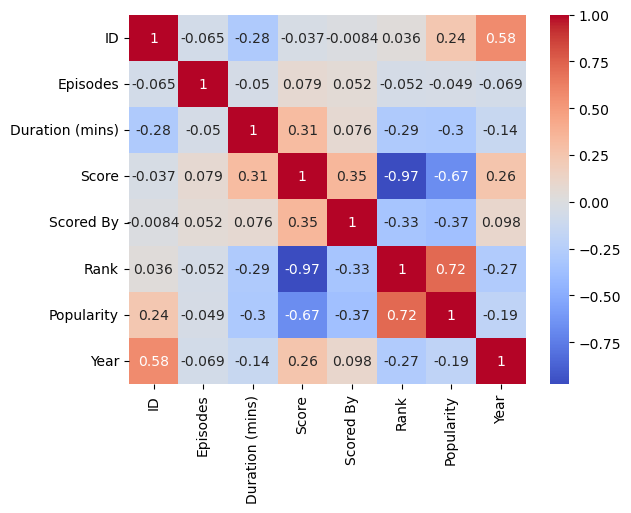

In [55]:
correlation_matrix = anime_df.corr()

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

In [51]:
from scipy.stats import kruskal
stat, p_value = kruskal(*[anime_df['Score'][anime_df['Type'] == cat] for cat in anime_df['Type'].unique()])
print(f"Kruskal-Wallis H statistic: {stat}, p-value: {p_value}")


Kruskal-Wallis H statistic: 2310.1869518189624, p-value: 0.0


In [52]:
from scipy.stats import kruskal
stat, p_value = kruskal(*[anime_df['Score'][anime_df['Genres'] == cat] for cat in anime_df['Genres'].unique()])
print(f"Kruskal-Wallis H statistic: {stat}, p-value: {p_value}")


Kruskal-Wallis H statistic: 4007.36909349745, p-value: 0.0
